In [103]:
import sys
sys.path.append('..')
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sfp_nsdsyn import *
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
pd.options.mode.chained_assignment = None
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [104]:
#TODO  make it organized
results_dir='/Volumes/server/Projects/sfp_nsd/natural-scenes-dataset/derivatives/derivatives_HPC/results_2D'
dataset = 'nsdsyn'
full_ver= [True]
if dataset == 'nsdsyn':
    sn_list = np.arange(1,9)
    stat = 'mean'
elif dataset == 'broderick':
    sn_list=[1, 6, 7, 45, 46, 62, 64, 81, 95, 114, 115, 121]
    stat = 'median'
lr_rate = [0.0005]
max_epoch = [30000]
roi_list = ['V1','V2','V3']
roi='V1'
fig_dir='/Users/jh7685/Dropbox/NYU/Projects/SF/MyResults/2D_tuning_prediction'

In [105]:
all_model_history = model.load_history_df_subj(results_dir, dataset, stat, full_ver, sn_list, lr_rate, max_epoch, 'model', roi_list)
final_params = all_model_history.query('epoch == 29999')

In [106]:
params =['sigma','slope','intercept','p_1','p_2','p_3','p_4','A_1','A_2']
group = [1,2,2,3,3,3,3,3,3]

In [107]:
precision_s = pd.read_csv(f'/Volumes/server/Projects/sfp_nsd/derivatives/dataframes/{dataset}/precision_s_{dataset}_{roi}.csv')
new_final_params = pd.merge(final_params, precision_s, on='subj')

In [51]:
new_final_params

epoch     sigma     slope  intercept       p_1       p_2       p_3  \
0  29999  2.444468  0.138925   0.216342 -0.160678 -0.045313 -0.114538   
1  29999  2.019560  0.123717   0.090956 -0.015425 -0.064137  0.147342   
2  29999  2.579941  0.051193   0.111091  0.138689 -0.150462  0.163207   
3  29999  1.975181  0.179895   0.122055  0.122718 -0.135793  0.099535   
4  29999  2.622015  0.107188   0.135675 -0.132166 -0.164759  0.016274   
5  29999  2.087170  0.166967   0.221159  0.159871 -0.173341  0.057587   
6  29999  2.249080  0.109479   0.093930  0.142332 -0.174437  0.123923   
7  29999  2.581744  0.199068   0.093001 -0.311129 -0.185420  0.065450   

        p_4       A_1       A_2    dset  lr_rate  max_epoch  full_ver    subj  \
0  0.032326  0.040104 -0.072530  nsdsyn   0.0005      30000      True  subj01   
1 -0.048341 -0.006036  0.034134  nsdsyn   0.0005      30000      True  subj02   
2 -0.040287 -0.021408  0.024107  nsdsyn   0.0005      30000      True  subj03   
3 -0.013634  0.046516  0.028437  nsdsyn   0.0005      30000      True  subj04   
4 -0.027864  0.043370  0.011752  nsdsyn   0.0005      30000      True  subj05   
5  0.040253  0.034356 -0.021300  nsdsyn   0.0005      30000      True  subj06   
6 -0.144933 -0.023559 -0.029919  nsdsyn   0.0005      30000      True  subj07   
7 -0.000913  0.109359  0.023116  nsdsyn   0.0005      30000      True  subj08   

  vroinames  precision  
0        V1   0.620622  
1        V1   0.379510  
2        V1   0.183690  
3        V1   0.579713  
4        V1   0.311575  
5        V1   0.551339  
6        V1   0.236601  
7        V1   0.196376

# Precision-weighted average parameters

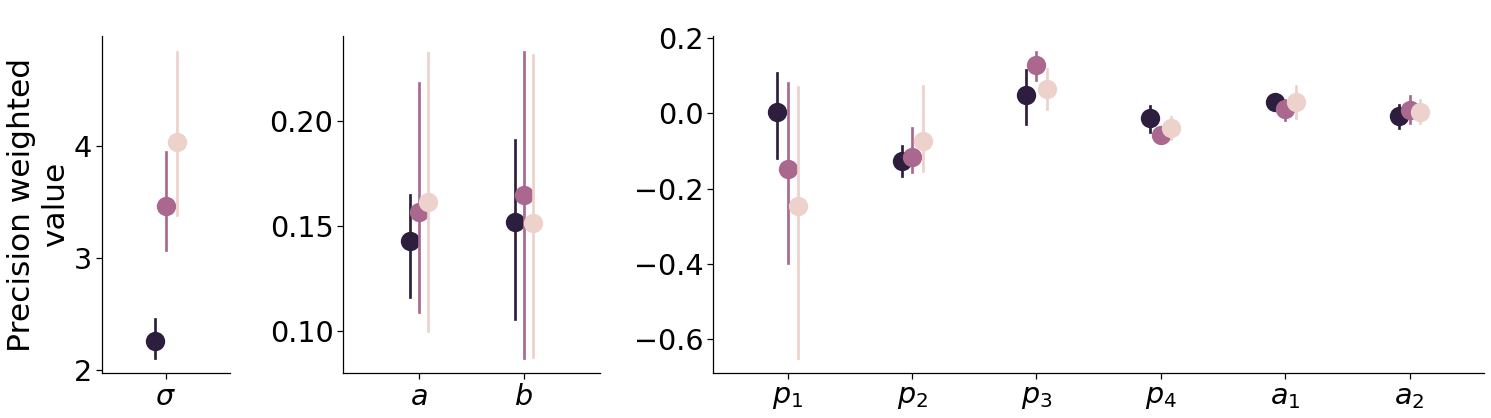

In [233]:
grid = vis.plot_precision_weighted_avg_parameters(new_final_params, params, group, hue='vroinames', hue_order=['V1','V2','V3'])

In [224]:
for line in grid.axes[0,0].lines:
    print(line.get_xdata().shape)



(1,)
(2,)
(1,)
(2,)
(1,)
(2,)


In [180]:
path.get_offsets().data[0,:].shape

(2,)

In [141]:
for ax in grid.axes: #subplot
    for path in ax.collections: # hue
        points = path.get_offsets().data
        reposition_amount = np.zeros(points.shape)
        reposition_amount[:,0] = np.random.rand(points.shape[0])*0.1
        new_location = points + reposition_amount
        path.set_offsets(new_location)
    for line in
        ax.lines[1].get_xdata()


new_location

array([[ 6.01836522e-02, -2.45395301e-01],
       [ 1.04861085e+00, -7.30895271e-02],
       [ 2.00434539e+00,  6.57587938e-02],
       [ 3.00448967e+00, -3.92662807e-02],
       [ 4.02116839e+00,  2.99415846e-02],
       [ 5.07958241e+00,  3.42772259e-03]])

In [ ]:
points.shape

# Parameters for individual subjects in precision order

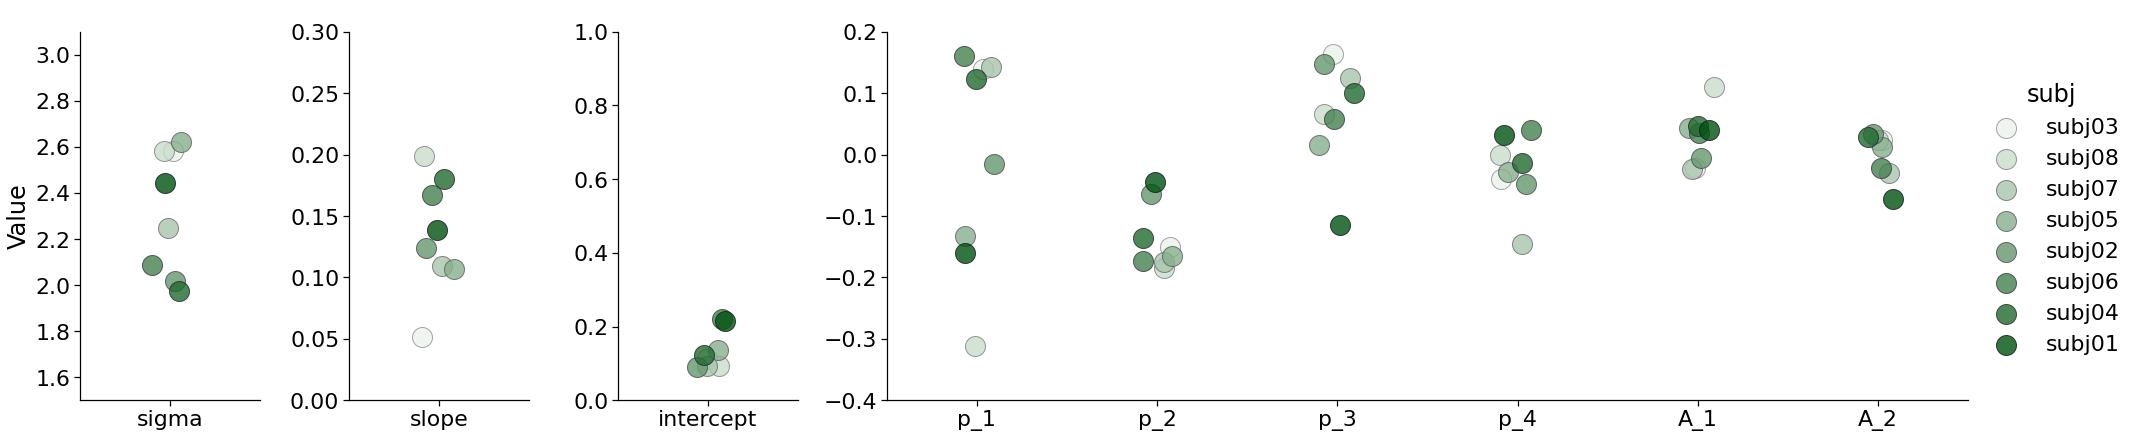

In [74]:
pal = vis.make_dset_palettes(dset=dataset)
dd = new_final_params.sort_values(by='precision', ignore_index=True, ascending=True)
grid, df = vis.plot_individual_parameters(new_final_params,
                                          params,
                                          [1,2,3,4,4,4,4,4,4],
                                          palette=pal,
                                          height=7,
                                          save_fig=False,
                                          save_path=os.path.join(fig_dir, f'{dataset}_individual.png'))

In [77]:
new_final_params.sigma.max()

2.6220149993896484

In [24]:
df = new_final_params
subplot_group = [1,2,3,4,4,4,4,4,4]

df = model.group_params(df, params, subplot_group)
x_label = "Parameter"
y_label = "Value"
groups, counts = np.unique(subplot_group, return_counts=True)
print(groups)
print(counts)

[1 2 3 4]
[1 1 1 6]


In [34]:
new_final_params

epoch     sigma     slope  intercept       p_1       p_2       p_3  \
0  29999  2.444468  0.138925   0.216342 -0.160678 -0.045313 -0.114538   
1  29999  1.975181  0.179895   0.122055  0.122718 -0.135793  0.099535   
2  29999  2.087170  0.166967   0.221159  0.159871 -0.173341  0.057587   
3  29999  2.019560  0.123717   0.090956 -0.015425 -0.064137  0.147342   
4  29999  2.622015  0.107188   0.135675 -0.132166 -0.164759  0.016274   
5  29999  2.249080  0.109479   0.093930  0.142332 -0.174437  0.123923   
6  29999  2.581744  0.199068   0.093001 -0.311129 -0.185420  0.065450   
7  29999  2.579941  0.051193   0.111091  0.138689 -0.150462  0.163207   

        p_4       A_1       A_2    dset  lr_rate  max_epoch  full_ver    subj  \
0  0.032326  0.040104 -0.072530  nsdsyn   0.0005      30000      True  subj01   
1 -0.013634  0.046516  0.028437  nsdsyn   0.0005      30000      True  subj04   
2  0.040253  0.034356 -0.021300  nsdsyn   0.0005      30000      True  subj06   
3 -0.048341 -0.006036  0.034134  nsdsyn   0.0005      30000      True  subj02   
4 -0.027864  0.043370  0.011752  nsdsyn   0.0005      30000      True  subj05   
5 -0.144933 -0.023559 -0.029919  nsdsyn   0.0005      30000      True  subj07   
6 -0.000913  0.109359  0.023116  nsdsyn   0.0005      30000      True  subj08   
7 -0.040287 -0.021408  0.024107  nsdsyn   0.0005      30000      True  subj03   

  vroinames  precision  
0        V1   0.620622  
1        V1   0.579713  
2        V1   0.551339  
3        V1   0.379510  
4        V1   0.311575  
5        V1   0.236601  
6        V1   0.196376  
7        V1   0.183690

In [29]:
df = df.sort_values(by='precision', ignore_index=True, ascending=True)
df

epoch    dset  lr_rate  max_epoch  full_ver    subj vroinames  precision  \
0   29999  nsdsyn   0.0005      30000      True  subj03        V1   0.183690   
1   29999  nsdsyn   0.0005      30000      True  subj03        V1   0.183690   
2   29999  nsdsyn   0.0005      30000      True  subj03        V1   0.183690   
3   29999  nsdsyn   0.0005      30000      True  subj03        V1   0.183690   
4   29999  nsdsyn   0.0005      30000      True  subj03        V1   0.183690   
..    ...     ...      ...        ...       ...     ...       ...        ...   
67  29999  nsdsyn   0.0005      30000      True  subj01        V1   0.620622   
68  29999  nsdsyn   0.0005      30000      True  subj01        V1   0.620622   
69  29999  nsdsyn   0.0005      30000      True  subj01        V1   0.620622   
70  29999  nsdsyn   0.0005      30000      True  subj01        V1   0.620622   
71  29999  nsdsyn   0.0005      30000      True  subj01        V1   0.620622   

   params     value group  
0     A_2  0.024107     4  
1   sigma  2.579941     1  
2     p_2 -0.150462     4  
3     A_1 -0.021408     4  
4     p_1  0.138689     4  
..    ...       ...   ...  
67    A_1  0.040104     4  
68    p_1 -0.160678     4  
69  slope  0.138925     2  
70    p_4  0.032326     4  
71  sigma  2.444468     1  

[72 rows x 11 columns]

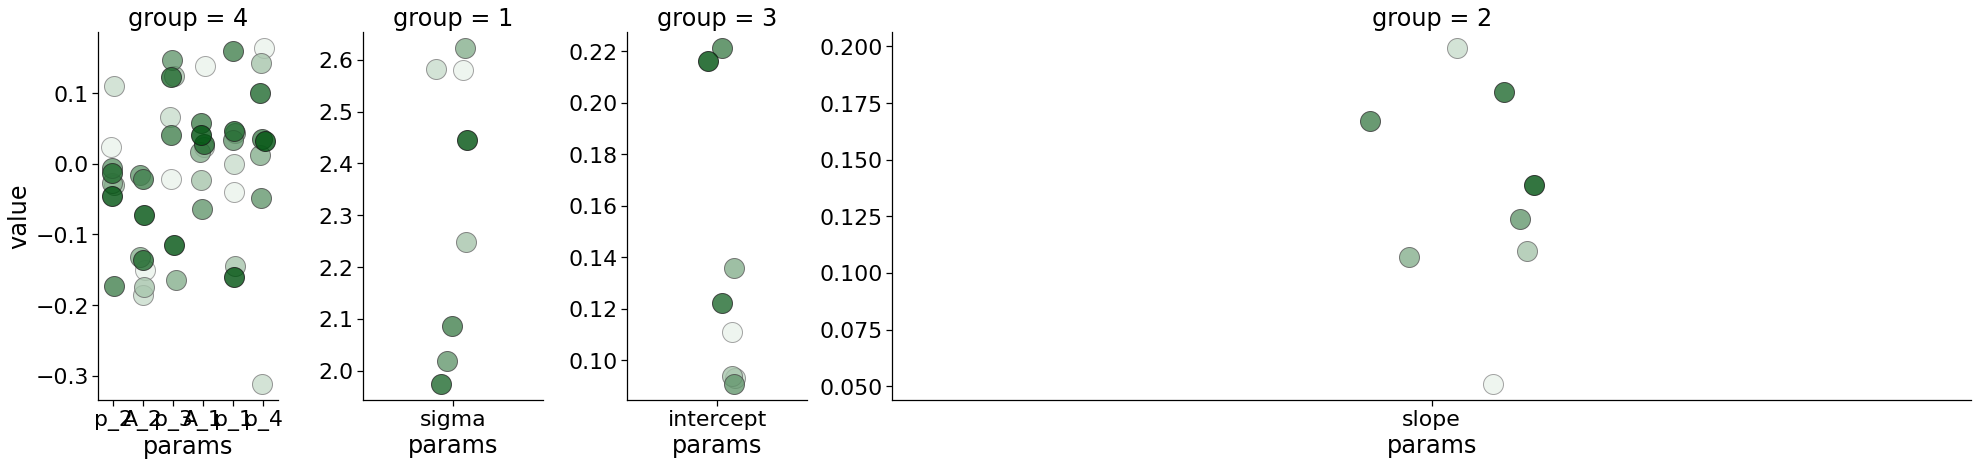

In [35]:
grid = sns.FacetGrid(df,
                     col="group",
                     hue='subj',
                     hue_order=df['subj'].unique(),
                     palette=pal,
                     height=7,
                     legend_out=True,
                     sharex=False, sharey=False, gridspec_kws={'width_ratios': counts})

grid.map(sns.stripplot, "params", "value", dodge=True, size=20, alpha=0.8, edgecolor="gray", linewidth=1)

In [ ]:


grid.add_legend()
for ax in range(len(groups)):
    grid.axes[0, ax].set_ylim(_find_ylim(ax, roi, avg=False))
    if counts[ax] > 1:
        grid.axes[0, ax].margins(x=1 - 0.45*ax)
for subplot_title, ax in grid.axes_dict.items():
    ax.set_title(f" ")
grid.set_axis_labels("", y_label)


In [307]:
test = vis.plot_2D_model_results.group_params(all_dset_params, params, group)

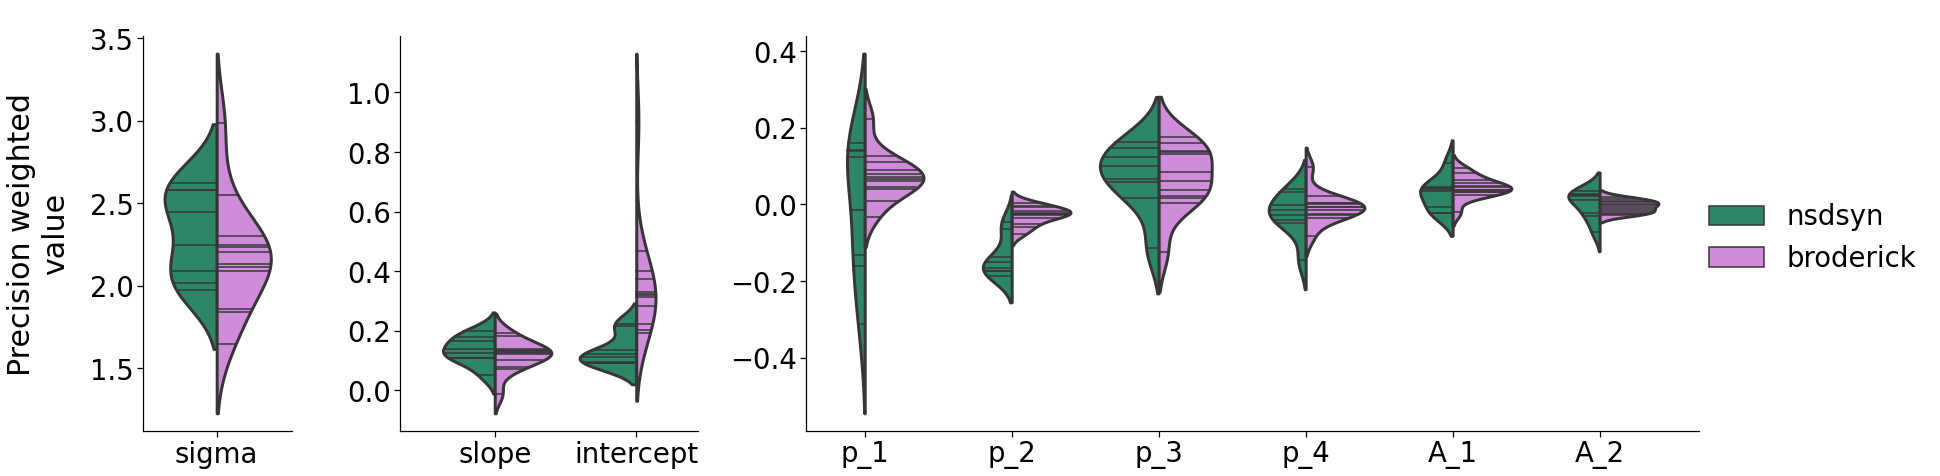

In [338]:
vis.plot_2D_model_results.violinplot_precision_weighted_avg_parameters(all_dset_params, params, group,
                                                                       save_fig=True,
                                                                       save_path=os.path.join(fig_dir, f'all_dsets_precision_weighted_params.png'))

In [ ]:
stim_info = pd.read_csv('/Volumes/server/Projects/sfp_nsd/natural-scenes-dataset/nsdsynthetic_sf_stim_description.csv')
stim_info = stim_info[['names','names_idx','w_r','w_a','phase','class_idx','freq_lvl']]
stim_info = stim_info.drop_duplicates('names').drop(columns=['names_idx','phase','class_idx','freq_lvl'])
display(stim_info)

names   w_r   w_a
0          pinwheel   0.0   6.0
24   forward spiral   4.0   4.0
48          annulus   6.0   0.0
72   reverse spiral   4.0  -4.0
96   intermediate 1  14.0  34.0
100  intermediate 2  34.0  14.0
104  intermediate 3  34.0 -14.0
108  intermediate 4  14.0 -34.0

In [ ]:
all_ecc_model_params = vis.plot_2D_model_results.merge_continuous_values_to_the_df(stim_info, val_range=(0,10), repeat=3, col_name='eccentricity')

In [ ]:
all_angle_model_params = vis.plot_2D_model_results.merge_continuous_values_to_the_df(all_ecc_model_params, val_range=(0,360), repeat=360, col_name='angle')
display(all_angle_model_params.head())
print(all_angle_model_params.shape)

names   w_r   w_a  eccentricity  angle
0        pinwheel   0.0   6.0           0.0    0.0
1  forward spiral   4.0   4.0           0.0    0.0
2         annulus   6.0   0.0           0.0    0.0
3  reverse spiral   4.0  -4.0           0.0    0.0
4  intermediate 1  14.0  34.0           0.0    0.0

(8640, 5)


In [ ]:
synthetic_stim_df = prep._calculate_local_orientation(all_angle_model_params)
display(synthetic_stim_df)

names   w_r   w_a  eccentricity  angle  local_ori
0           pinwheel   0.0   6.0           0.0    0.0   1.570796
1     forward spiral   4.0   4.0           0.0    0.0   0.785398
2            annulus   6.0   0.0           0.0    0.0   0.000000
3     reverse spiral   4.0  -4.0           0.0    0.0   2.356194
4     intermediate 1  14.0  34.0           0.0    0.0   1.180189
...              ...   ...   ...           ...    ...        ...
8635  reverse spiral   4.0  -4.0          10.0  360.0   2.356194
8636  intermediate 1  14.0  34.0          10.0  360.0   1.180189
8637  intermediate 2  34.0  14.0          10.0  360.0   0.390607
8638  intermediate 3  34.0 -14.0          10.0  360.0   2.750986
8639  intermediate 4  14.0 -34.0          10.0  360.0   1.961403

[8640 rows x 6 columns]

In [ ]:
synthetic_stim_df['angle'] = np.deg2rad(synthetic_stim_df['angle'])
synthetic_stim_df.tail()

names   w_r   w_a  eccentricity     angle  local_ori
8635  reverse spiral   4.0  -4.0          10.0  6.283185   2.356194
8636  intermediate 1  14.0  34.0          10.0  6.283185   1.180189
8637  intermediate 2  34.0  14.0          10.0  6.283185   0.390607
8638  intermediate 3  34.0 -14.0          10.0  6.283185   2.750986
8639  intermediate 4  14.0 -34.0          10.0  6.283185   1.961403

In [ ]:
all_subj_df = pd.DataFrame({})
for sn in sn_list:
    subj = utils.sub_number_to_string(sn, dataset=dataset)
    subj_df = synthetic_stim_df.copy()
    subj_df['subj'] = subj
    subj_df['Pv'] = subj_df.apply(model.get_Pv_row, params=new_final_params.query('subj == @subj'), axis=1)
    all_subj_df = all_subj_df.append(subj_df, ignore_index=True)

print(all_subj_df.shape)

(103680, 8)


In [ ]:
new_subj_df = pd.merge(all_subj_df, new_final_params[['sigma_squared_s','subj']], on='subj')

In [ ]:
new_subj_df

names   w_r   w_a  eccentricity     angle  local_ori  \
0             pinwheel   0.0   6.0           0.0  0.000000   1.570796   
1       forward spiral   4.0   4.0           0.0  0.000000   0.785398   
2              annulus   6.0   0.0           0.0  0.000000   0.000000   
3       reverse spiral   4.0  -4.0           0.0  0.000000   2.356194   
4       intermediate 1  14.0  34.0           0.0  0.000000   1.180189   
...                ...   ...   ...           ...       ...        ...   
103675  reverse spiral   4.0  -4.0          10.0  6.283185   2.356194   
103676  intermediate 1  14.0  34.0          10.0  6.283185   1.180189   
103677  intermediate 2  34.0  14.0          10.0  6.283185   0.390607   
103678  intermediate 3  34.0 -14.0          10.0  6.283185   2.750986   
103679  intermediate 4  14.0 -34.0          10.0  6.283185   1.961403   

                 subj        Pv  sigma_squared_s  
0       sub-wlsubj001  0.386208        10.369273  
1       sub-wlsubj001  0.407821        10.369273  
2       sub-wlsubj001  0.398246        10.369273  
3       sub-wlsubj001  0.407821        10.369273  
4       sub-wlsubj001  0.395685        10.369273  
...               ...       ...              ...  
103675  sub-wlsubj121  0.799262         5.570611  
103676  sub-wlsubj121  0.583462         5.570611  
103677  sub-wlsubj121  0.977883         5.570611  
103678  sub-wlsubj121  0.977883         5.570611  
103679  sub-wlsubj121  0.583462         5.570611  

[103680 rows x 9 columns]

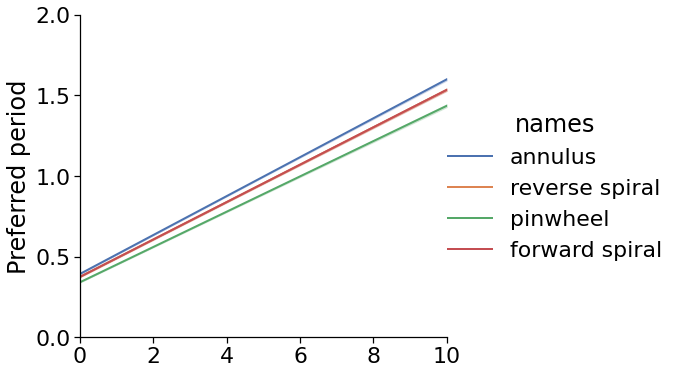

In [ ]:
stim_class = ['pinwheel','annulus','forward spiral','reverse spiral']
vis.plot_2D_model_results.plot_preferred_period(new_subj_df.query('names in @stim_class'), col=None,
                                                save_fig=True, save_path=os.path.join(fig_dir, f'{dataset}_precision_weighted_preferred_period.png'))

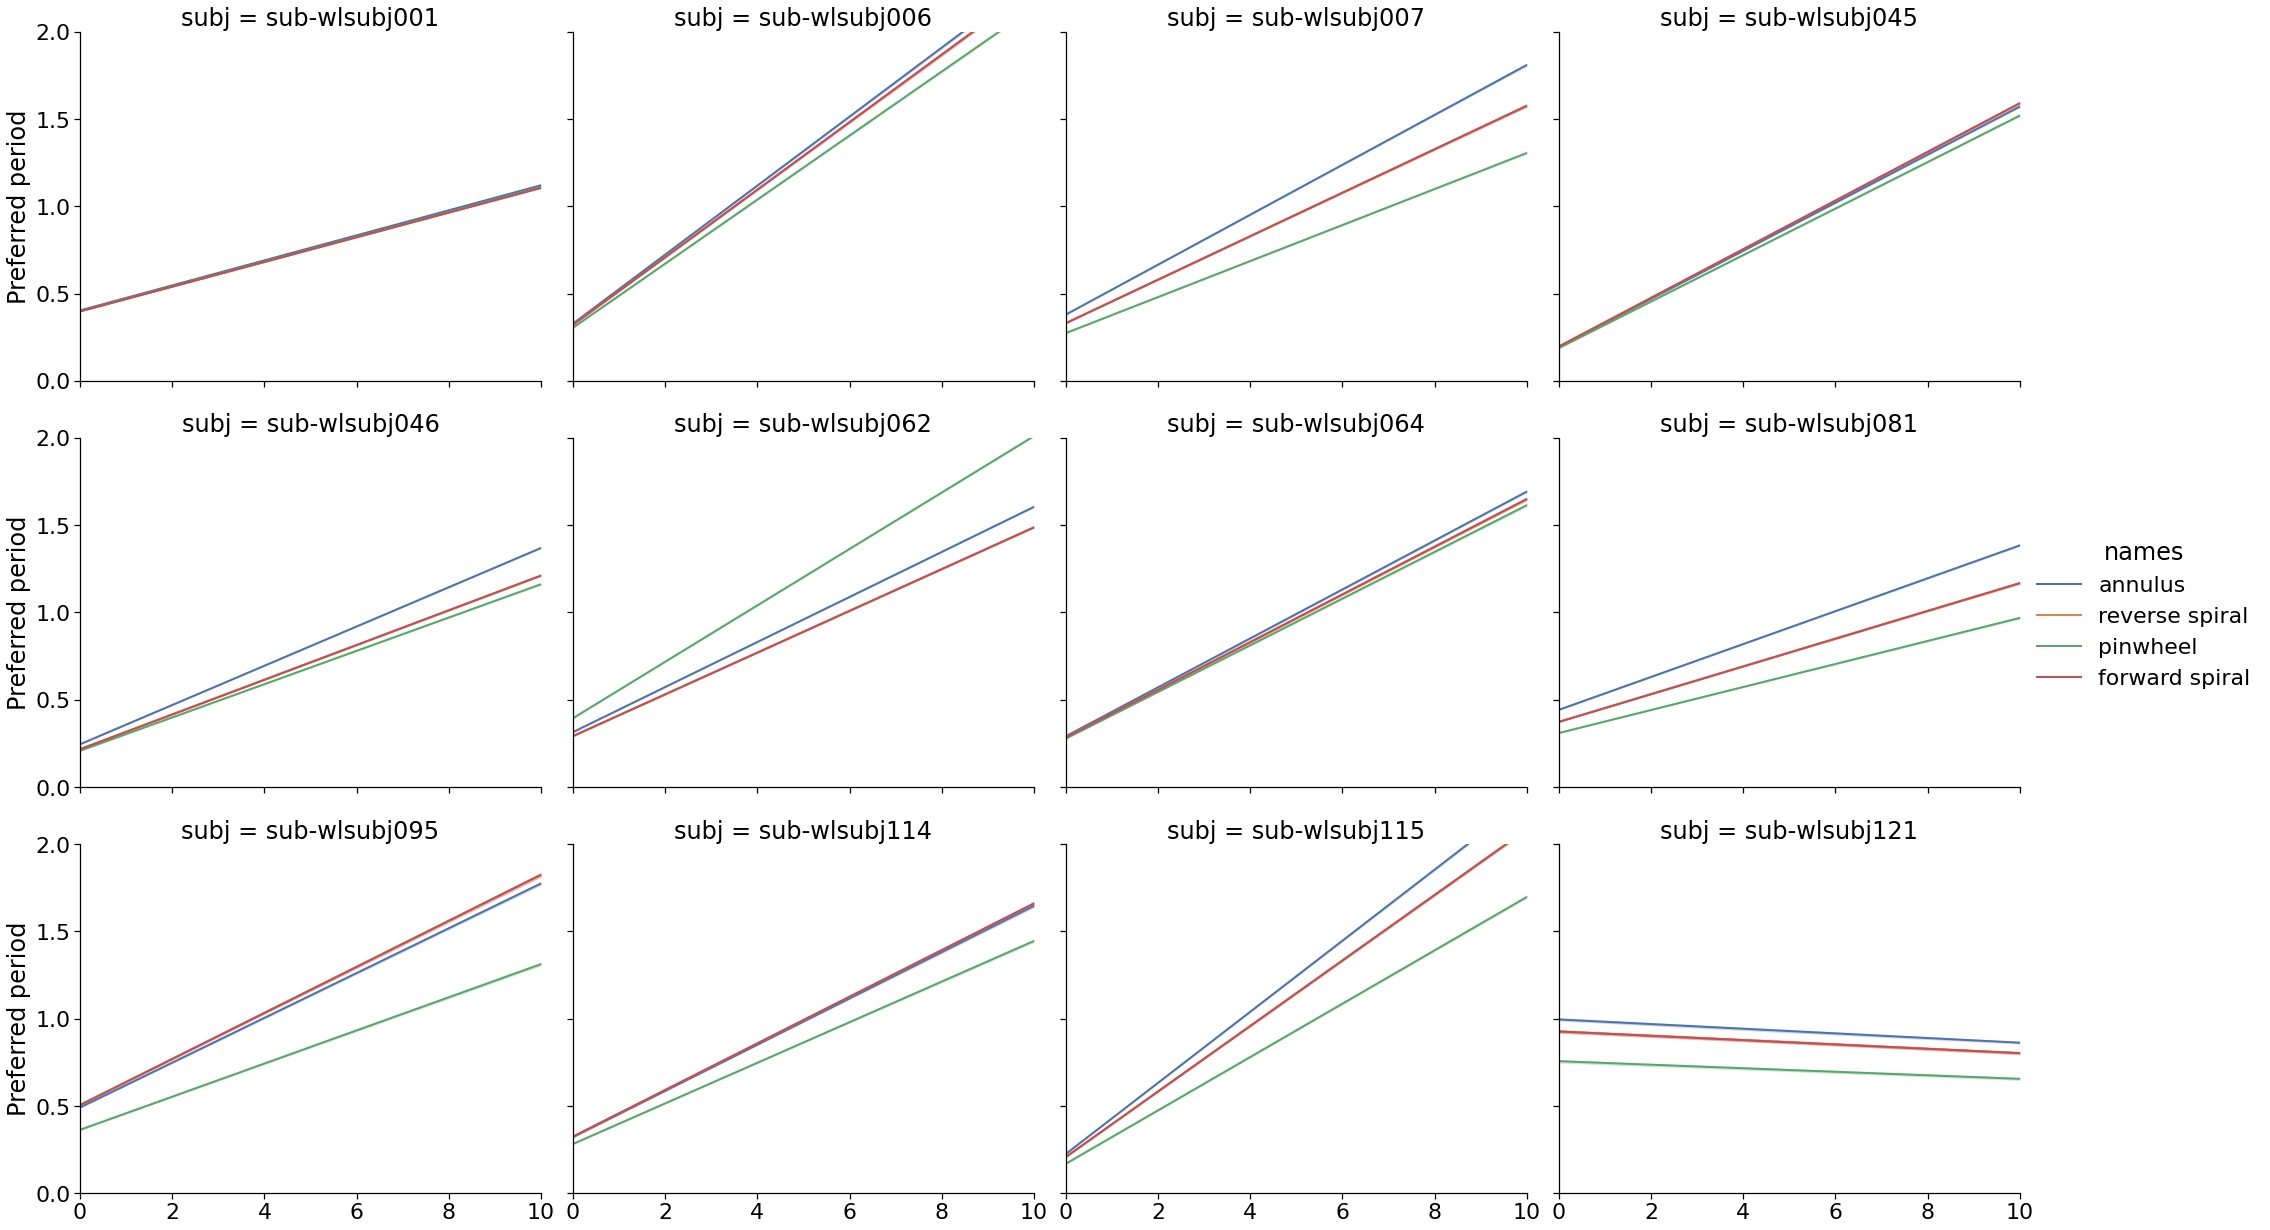

In [ ]:
vis.plot_2D_model_results.plot_preferred_period(new_subj_df.query('names in @stim_class'),
                                                save_fig=True, save_path=os.path.join(fig_dir, f'{dataset}_precision_weighted_preferred_period_individual.png'))

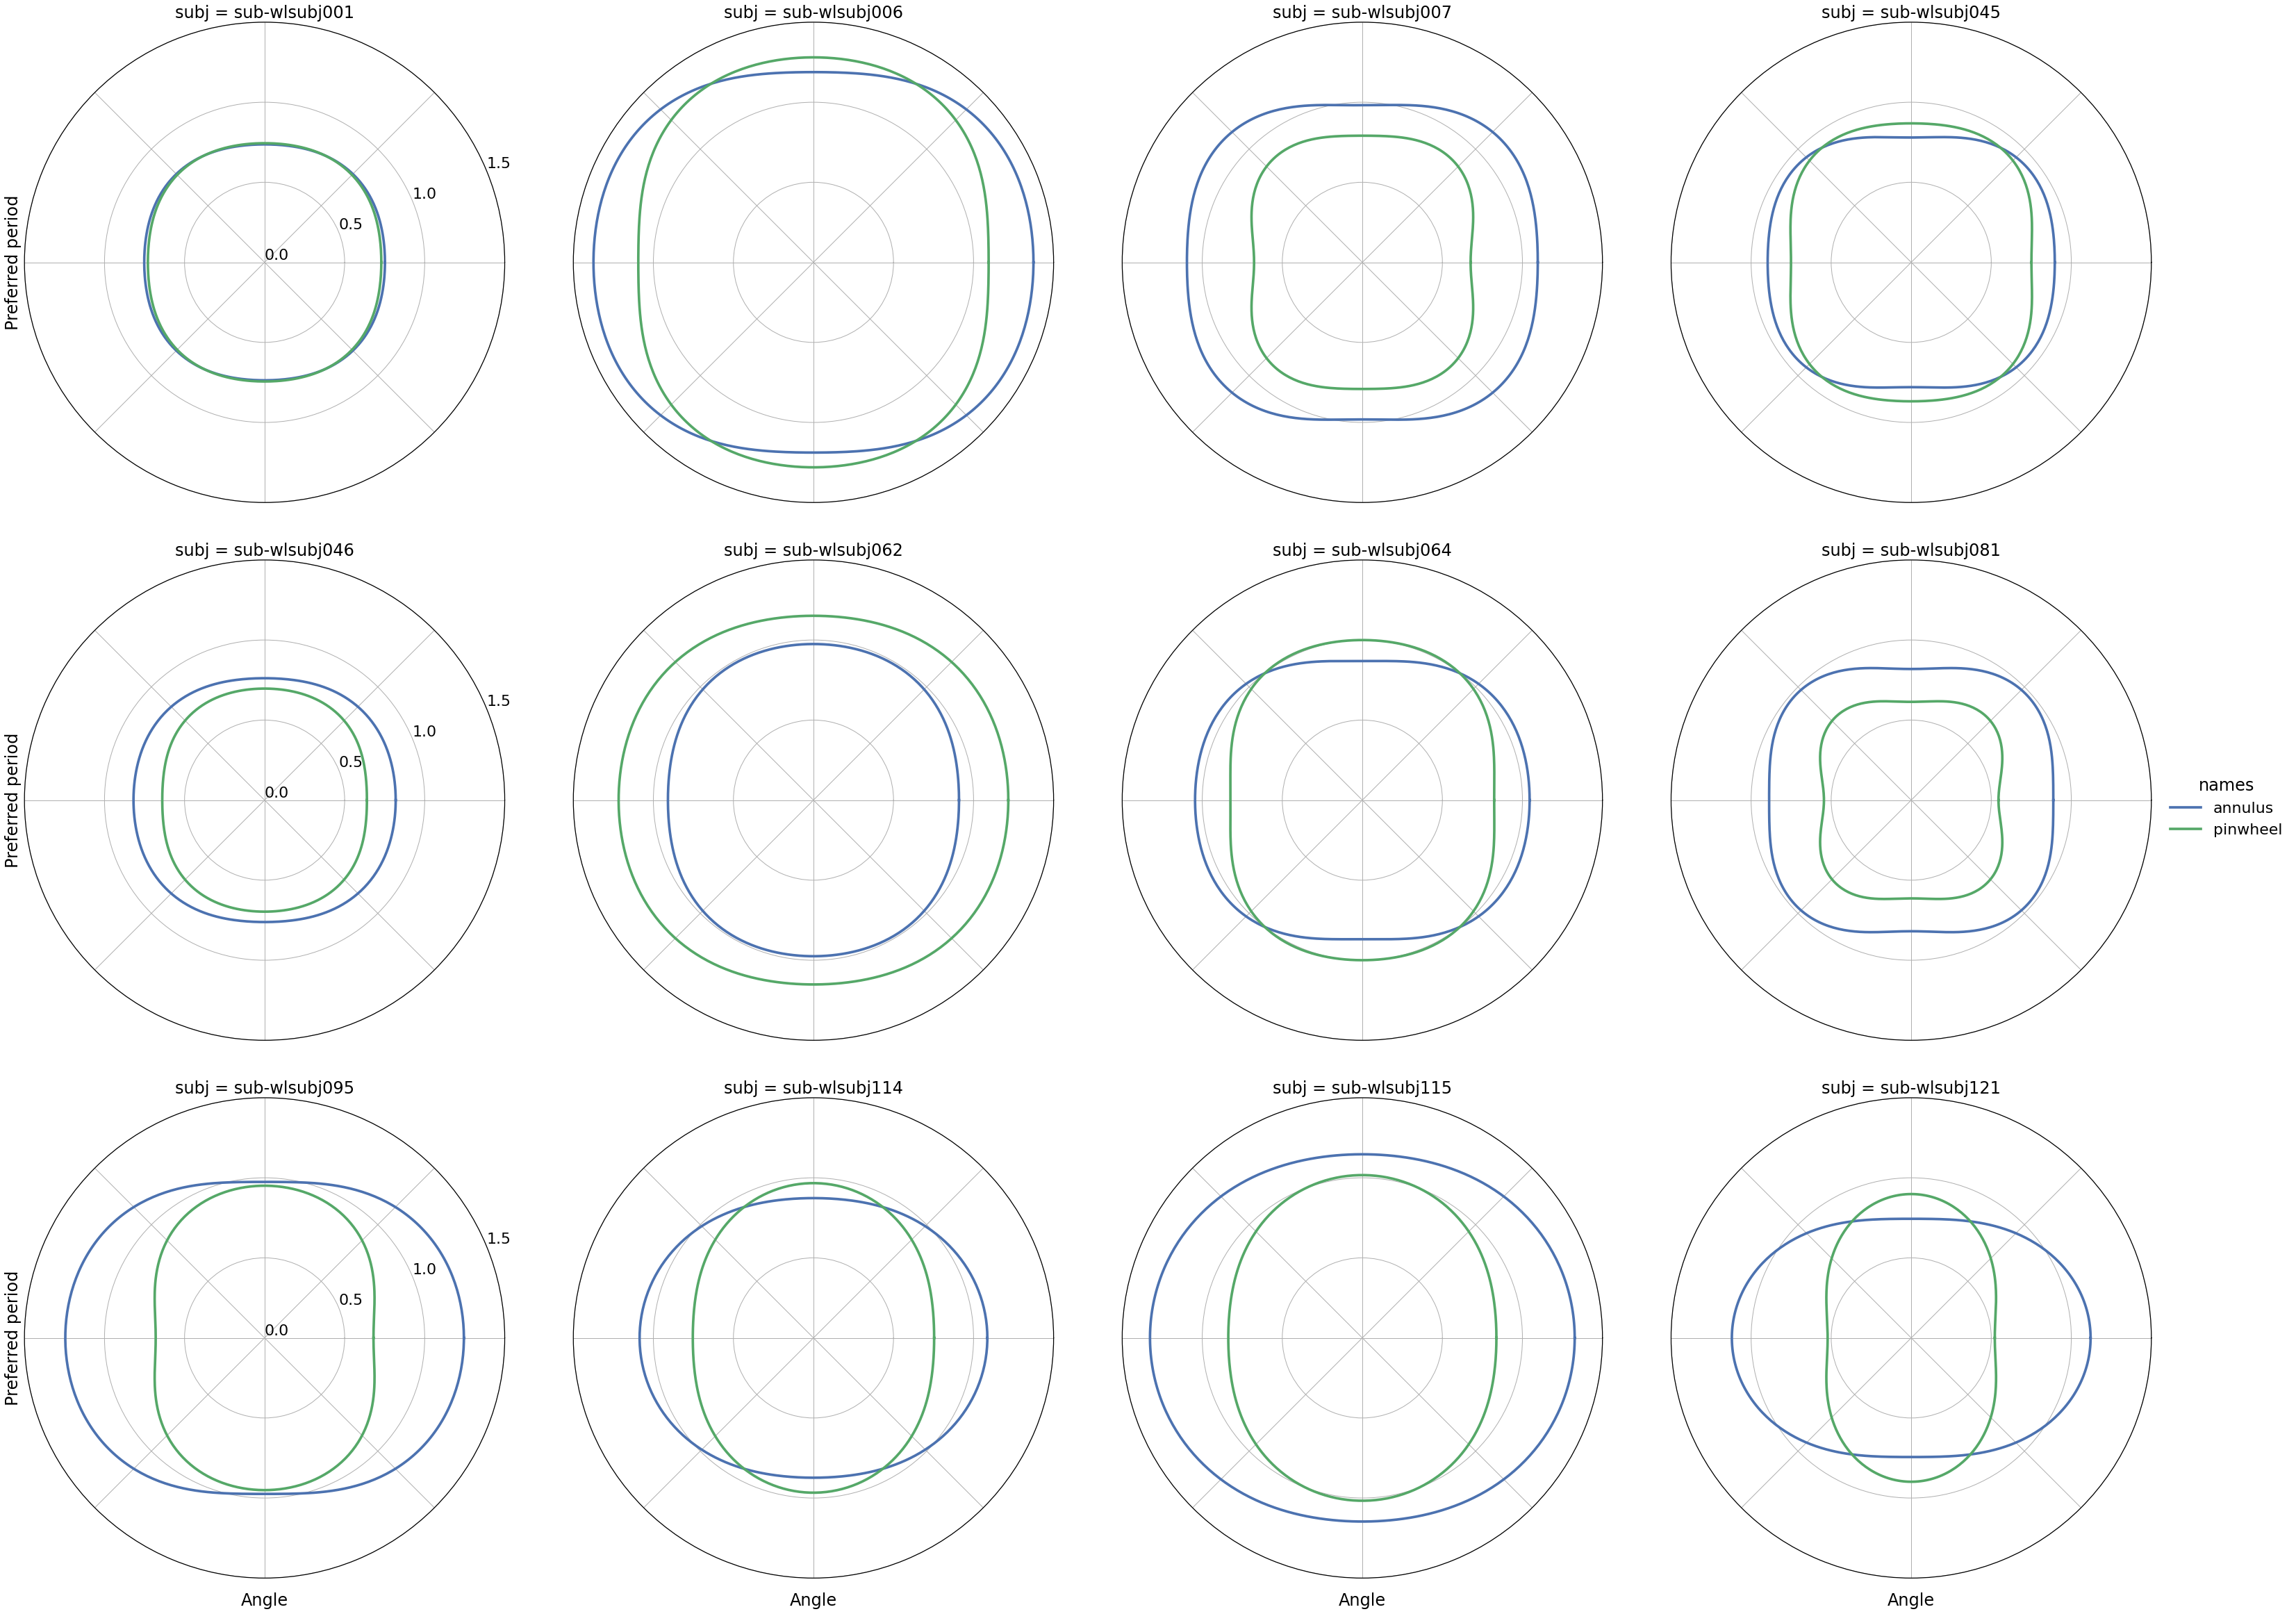

In [ ]:
stim_class = ['pinwheel','annulus']
vis.plot_2D_model_results.polarplot_preferred_period(new_subj_df.query('names in @stim_class & eccentricity == 5'), col='subj', height=11, save_fig=True, save_path=os.path.join(fig_dir, f'{dataset}_precision_weighted_polar_preferred_period_individual.png'))

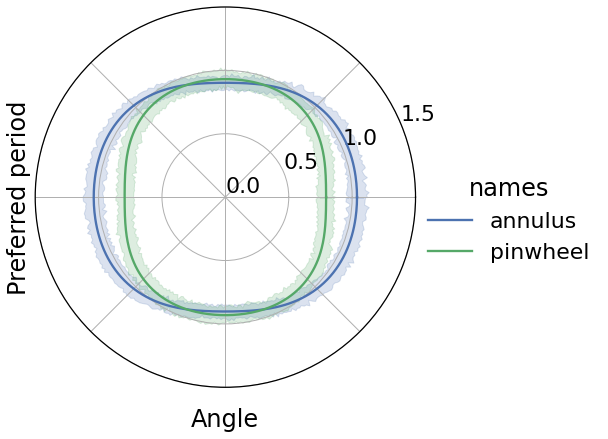

In [ ]:
vis.plot_2D_model_results.polarplot_preferred_period(new_subj_df.query('names in @stim_class & eccentricity == 5'), col=None, height=7, save_fig=True, save_path=os.path.join(fig_dir, f'{dataset}_precision_weighted_polar_preferred_period.png'))

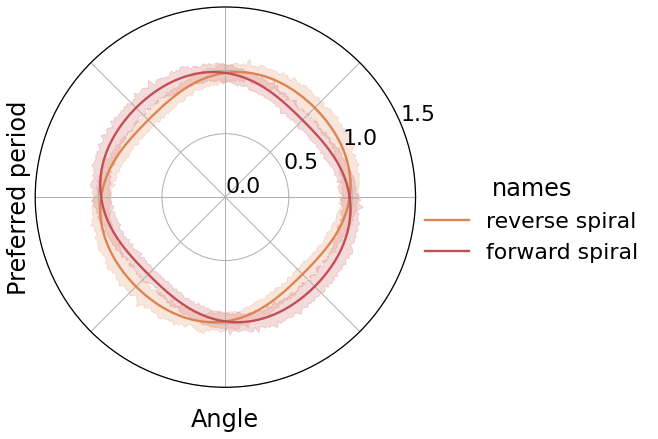

In [273]:
stim_class = ['forward spiral', 'reverse spiral']
vis.plot_2D_model_results.polarplot_preferred_period(new_subj_df.query('names in @stim_class & eccentricity == 5'), col=None, height=7, save_fig=True, save_path=os.path.join(fig_dir, f'{dataset}_precision_weighted_polar_preferred_period_spirals.png'))

In [339]:
dataset = 'broderick'
full_ver= [True]
if dataset == 'nsdsyn':
    sn_list = np.arange(1,9)
    stat = 'mean'
elif dataset == 'broderick':
    sn_list=[1, 6, 7, 45, 46, 62, 64, 81, 95, 114, 115, 121]
    stat = 'median'

broderick_df = pd.DataFrame({})


1


KeyError: ('subj', 'voxel', 'sigma_v_squared')

In [344]:
for sn in sn_list[1:]:
    print(f'{sn}')
    subj = utils.sub_number_to_string(sn, dataset)
    subj_df = pd.read_csv(f'/Volumes/server/Projects/sfp_nsd/derivatives/dataframes/{dataset}/{subj}_stim_voxel_info_df_vs-pRFsigma_V1.csv')
    subj_df = subj_df[['subj','voxel','sigma_v_squared']]
    subj_df = subj_df.drop_duplicates(['voxel'])
    broderick_df = broderick_df.append(subj_df)

6
7
45
46
62
64
81
95
114
115
121


In [345]:
broderick_df['dset'] = 'Broderick'

In [346]:
dataset = 'nsdsyn'
full_ver= [True]
if dataset == 'nsdsyn':
    sn_list = np.arange(1,9)
    stat = 'mean'
elif dataset == 'broderick':
    sn_list=[1, 6, 7, 45, 46, 62, 64, 81, 95, 114, 115, 121]
    stat = 'median'

for sn in sn_list:
    print(f'{sn}')
    subj = utils.sub_number_to_string(sn, dataset)
    subj_df = pd.read_csv(f'/Volumes/server/Projects/sfp_nsd/derivatives/dataframes/{dataset}/{subj}_stim_voxel_info_df_vs-pRFsigma_V1.csv')
    subj_df = subj_df[['subj','voxel','sigma_v_squared']]
    subj_df = subj_df.drop_duplicates(['voxel'])
    subj_df['dset'] = 'NSD'
    broderick_df = broderick_df.append(subj_df)

1
2
3
4
5
6
7
8


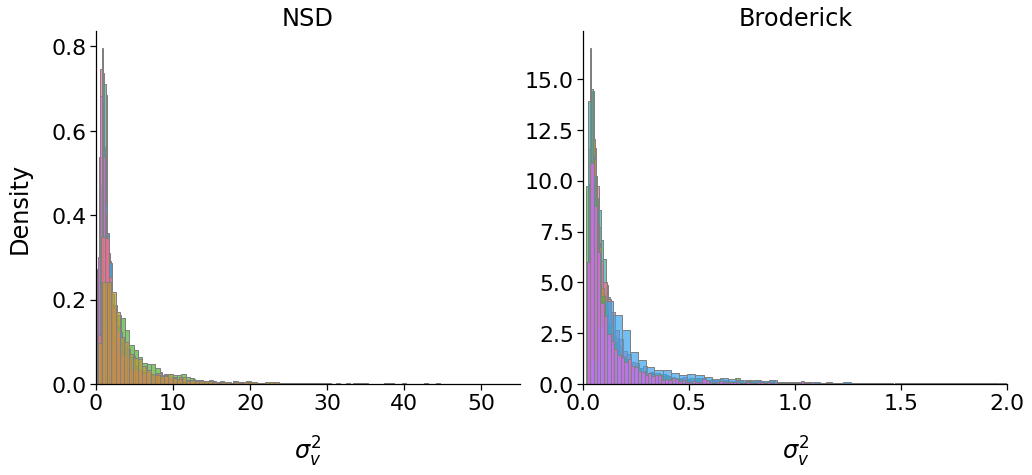

In [590]:
vis.plot_2D_model_results.SD_histogram(broderick_df, save_fig=True, save_path=os.path.join(fig_dir, f'alldsets_sigma_squared_distribution.png'))

In [383]:
mean_sd_df = broderick_df.groupby(['dset','subj'], group_keys=False).mean().reset_index()
bd_df = mean_sd_df.query('dset == "Broderick"').sort_values(by='sigma_v_squared', ignore_index=True)
nsd_df = mean_sd_df.query('dset == "NSD"').sort_values(by='sigma_v_squared', ignore_index=True)


In [474]:
final_params = final_params.merge(bd_df, on=['subj','dset'])
final_params = final_params.sort_values(by='sigma_v_squared', ignore_index=True, ascending=False)

In [548]:
broderick_df.dset.unique()

array(['Broderick', 'NSD'], dtype=object)

In [501]:
c_list = sns.diverging_palette(130, 300, s=100, l=30, n=2, as_cmap=False)
hex_color = c_list.as_hex()
broderick_pal = utils.color_husl_palette_different_shades(12, hex_color[1])
nsd_pal = utils.color_husl_palette_different_shades(8, hex_color[0])

In [524]:
df.query('dset == "Broderick"')

epoch     sigma     slope  intercept       p_1       p_2       p_3  \
0   29999  1.650163  0.182881   0.202630  0.080356 -0.005697  0.138515   
1   29999  1.859566  0.123812   0.328673  0.060503 -0.059433  0.160803   
2   29999  2.130340  0.136759   0.284252  0.091025 -0.036157  0.023343   
3   29999  2.236669  0.101690   0.221754  0.039310 -0.023616  0.083696   
4   29999  1.839831  0.137402   0.193707  0.066500 -0.050486  0.016282   
5   29999  2.249078  0.079767   0.374599  0.044345 -0.077721  0.177016   
6   29999  2.548057 -0.012045   0.901276  0.223751  0.004473  0.131947   
7   29999  2.300413  0.121761   0.466371  0.125765 -0.021344  0.136857   
8   29999  2.115541  0.132440   0.323145 -0.033379 -0.018277 -0.122890   
9   29999  2.089035  0.128973   0.312971  0.111180 -0.003874  0.062324   
10  29999  2.984196  0.071027   0.400024  0.009960 -0.023560  0.005086   
11  29999  2.207649  0.192008   0.318536  0.072753 -0.027144  0.036718   

         p_4       A_1       A_2       dset  lr_rate  max_epoch  full_ver  \
0  -0.025761  0.044594 -0.016890  Broderick   0.0005      30000      True   
1  -0.005691  0.033455  0.018466  Broderick   0.0005      30000      True   
2   0.001187  0.025593  0.001959  Broderick   0.0005      30000      True   
3   0.022005  0.039015 -0.012657  Broderick   0.0005      30000      True   
4  -0.014123  0.080934 -0.027548  Broderick   0.0005      30000      True   
5   0.003899  0.037286  0.005977  Broderick   0.0005      30000      True   
6  -0.028083  0.056536 -0.000606  Broderick   0.0005      30000      True   
7  -0.083407 -0.019852  0.014446  Broderick   0.0005      30000      True   
8   0.097172  0.064806 -0.021059  Broderick   0.0005      30000      True   
9  -0.035700  0.094206 -0.024604  Broderick   0.0005      30000      True   
10  0.004069  0.031463 -0.007001  Broderick   0.0005      30000      True   
11 -0.007561  0.047686  0.008027  Broderick   0.0005      30000      True   

             subj vroinames        voxel  sigma_v_squared  
0   sub-wlsubj115        V1  2210.420999         0.503349  
1   sub-wlsubj007        V1  1919.263028         0.263597  
2   sub-wlsubj064        V1  2241.684834         0.235061  
3   sub-wlsubj046        V1  2131.485154         0.187891  
4   sub-wlsubj045        V1  2477.644267         0.186538  
5   sub-wlsubj081        V1  2954.677771         0.180827  
6   sub-wlsubj121        V1  2147.914576         0.179514  
7   sub-wlsubj095        V1  1930.329709         0.166228  
8   sub-wlsubj062        V1  2252.426096         0.165124  
9   sub-wlsubj114        V1  2997.187811         0.148255  
10  sub-wlsubj001        V1  1908.200303         0.096439  
11  sub-wlsubj006        V1  1800.349068         0.091271

In [526]:
group

[1, 2, 2, 3, 3, 3, 3, 3, 3]

In [107]:
df = model.group_params(new_final_params, params, [1,2,3,4,4,4,4,4,4])
df

epoch    dset  lr_rate  max_epoch  full_ver    subj vroinames  precision  \
0   29999  nsdsyn   0.0005      30000      True  subj01        V1   0.620622   
1   29999  nsdsyn   0.0005      30000      True  subj02        V1   0.379510   
2   29999  nsdsyn   0.0005      30000      True  subj03        V1   0.183690   
3   29999  nsdsyn   0.0005      30000      True  subj04        V1   0.579713   
4   29999  nsdsyn   0.0005      30000      True  subj05        V1   0.311575   
..    ...     ...      ...        ...       ...     ...       ...        ...   
67  29999  nsdsyn   0.0005      30000      True  subj04        V1   0.579713   
68  29999  nsdsyn   0.0005      30000      True  subj05        V1   0.311575   
69  29999  nsdsyn   0.0005      30000      True  subj06        V1   0.551339   
70  29999  nsdsyn   0.0005      30000      True  subj07        V1   0.236601   
71  29999  nsdsyn   0.0005      30000      True  subj08        V1   0.196376   

   params     value group  
0   sigma  2.444468     1  
1   sigma  2.019560     1  
2   sigma  2.579941     1  
3   sigma  1.975181     1  
4   sigma  2.622015     1  
..    ...       ...   ...  
67    A_2  0.028437     4  
68    A_2  0.011752     4  
69    A_2 -0.021300     4  
70    A_2 -0.029919     4  
71    A_2  0.023116     4  

[72 rows x 11 columns]

In [545]:
df = df.sort_values(by='sigma_v_squared', ascending=False)
df

epoch     sigma     slope  intercept       p_1       p_2       p_3  \
0   29999  2.579941  0.051193   0.111091  0.138689 -0.150462  0.163207   
1   29999  2.581744  0.199068   0.093001 -0.311129 -0.185420  0.065450   
2   29999  2.249080  0.109479   0.093930  0.142332 -0.174437  0.123923   
3   29999  2.622015  0.107188   0.135675 -0.132166 -0.164759  0.016274   
4   29999  2.019560  0.123717   0.090956 -0.015425 -0.064137  0.147342   
5   29999  2.087170  0.166967   0.221159  0.159871 -0.173341  0.057587   
6   29999  1.975181  0.179895   0.122055  0.122718 -0.135793  0.099535   
7   29999  2.444468  0.138925   0.216342 -0.160678 -0.045313 -0.114538   
0   29999  1.650163  0.182881   0.202630  0.080356 -0.005697  0.138515   
1   29999  1.859566  0.123812   0.328673  0.060503 -0.059433  0.160803   
2   29999  2.130340  0.136759   0.284252  0.091025 -0.036157  0.023343   
3   29999  2.236669  0.101690   0.221754  0.039310 -0.023616  0.083696   
4   29999  1.839831  0.137402   0.193707  0.066500 -0.050486  0.016282   
5   29999  2.249078  0.079767   0.374599  0.044345 -0.077721  0.177016   
6   29999  2.548057 -0.012045   0.901276  0.223751  0.004473  0.131947   
7   29999  2.300413  0.121761   0.466371  0.125765 -0.021344  0.136857   
8   29999  2.115541  0.132440   0.323145 -0.033379 -0.018277 -0.122890   
9   29999  2.089035  0.128973   0.312971  0.111180 -0.003874  0.062324   
10  29999  2.984196  0.071027   0.400024  0.009960 -0.023560  0.005086   
11  29999  2.207649  0.192008   0.318536  0.072753 -0.027144  0.036718   

         p_4       A_1       A_2       dset  lr_rate  max_epoch  full_ver  \
0  -0.040287 -0.021408  0.024107        NSD   0.0005      30000      True   
1  -0.000913  0.109359  0.023116        NSD   0.0005      30000      True   
2  -0.144933 -0.023559 -0.029919        NSD   0.0005      30000      True   
3  -0.027864  0.043370  0.011752        NSD   0.0005      30000      True   
4  -0.048341 -0.006036  0.034134        NSD   0.0005      30000      True   
5   0.040253  0.034356 -0.021300        NSD   0.0005      30000      True   
6  -0.013634  0.046516  0.028437        NSD   0.0005      30000      True   
7   0.032326  0.040104 -0.072530        NSD   0.0005      30000      True   
0  -0.025761  0.044594 -0.016890  Broderick   0.0005      30000      True   
1  -0.005691  0.033455  0.018466  Broderick   0.0005      30000      True   
2   0.001187  0.025593  0.001959  Broderick   0.0005      30000      True   
3   0.022005  0.039015 -0.012657  Broderick   0.0005      30000      True   
4  -0.014123  0.080934 -0.027548  Broderick   0.0005      30000      True   
5   0.003899  0.037286  0.005977  Broderick   0.0005      30000      True   
6  -0.028083  0.056536 -0.000606  Broderick   0.0005      30000      True   
7  -0.083407 -0.019852  0.014446  Broderick   0.0005      30000      True   
8   0.097172  0.064806 -0.021059  Broderick   0.0005      30000      True   
9  -0.035700  0.094206 -0.024604  Broderick   0.0005      30000      True   
10  0.004069  0.031463 -0.007001  Broderick   0.0005      30000      True   
11 -0.007561  0.047686  0.008027  Broderick   0.0005      30000      True   

             subj vroinames         voxel  sigma_v_squared  
0          subj03        V1  10007.370533         5.443954  
1          subj08        V1   7139.854916         5.092268  
2          subj07        V1   7557.220803         4.226522  
3          subj05        V1   6788.628361         3.209504  
4          subj02        V1  10644.522347         2.634977  
5          subj06        V1   9606.407080         1.813766  
6          subj04        V1   7939.691133         1.724993  
7          subj01        V1   9169.066291         1.611287  
0   sub-wlsubj115        V1   2210.420999         0.503349  
1   sub-wlsubj007        V1   1919.263028         0.263597  
2   sub-wlsubj064        V1   2241.684834         0.235061  
3   sub-wlsubj046        V1   2131.485154         0.187891  
4   sub-wlsubj045        V1   2477.644

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


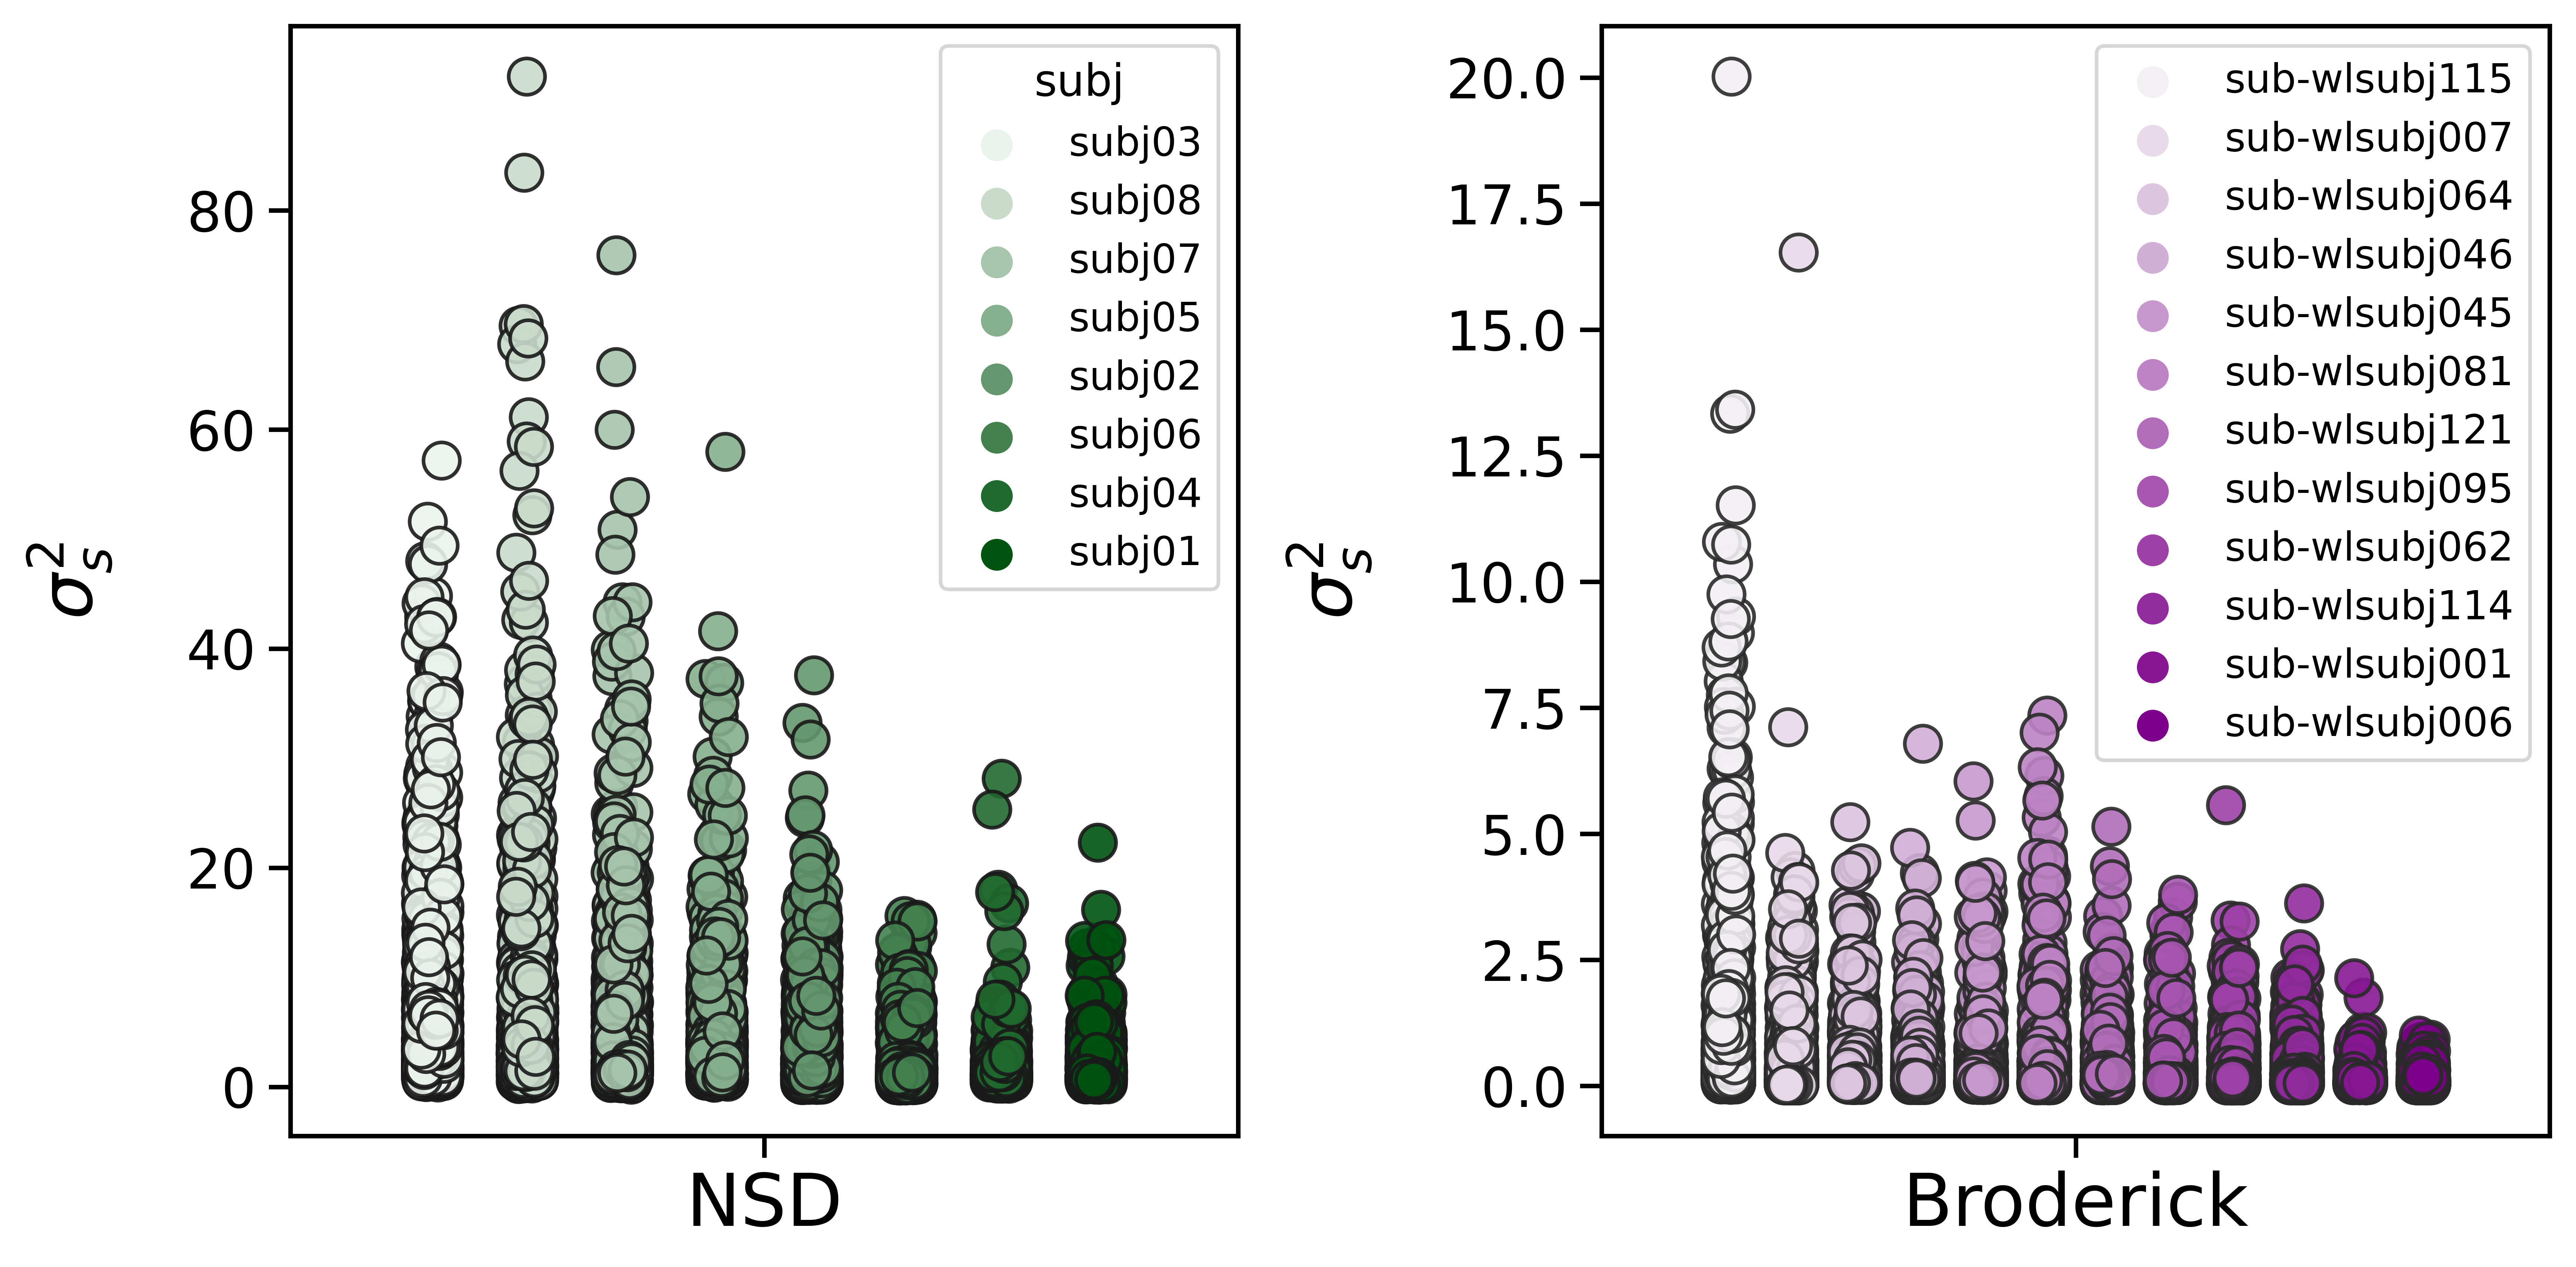

In [549]:
sns.set_context('notebook')
plt.rc('xtick', labelsize=20)  # fontsize of the tick labels
plt.rc('ytick', labelsize=15)
plt.rc('axes', labelsize=20)
f, axes = plt.subplots(1, 2, figsize=(10,5), dpi=700)
g = sns.stripplot(data=broderick_df.query('dset == "NSD"'), x='dset',y="sigma_v_squared",  hue='subj', hue_order=df.query('dset== "NSD"').subj.unique(), palette=nsd_pal, dodge=True, size=10, alpha=0.9, edgecolor="gray", linewidth=1, ax=axes[0])
g.set(xlabel="", ylabel=r'$\sigma^2_s$')



plt.legend(bbox_to_anchor=(1, 1), loc='upper right')
g = sns.stripplot(data=broderick_df.query('dset == "Broderick"'), x='dset',y="sigma_v_squared", hue='subj', hue_order=df.query('dset== "Broderick"').subj.unique(), palette=broderick_pal, dodge=True, size=10, alpha=0.9, edgecolor="gray", linewidth=1, ax=axes[1])
g.set(xlabel="", ylabel=r'$\sigma^2_s$')
plt.legend(bbox_to_anchor=(1, 1), loc='upper right')
plt.tight_layout()
plt.savefig(os.path.join(fig_dir, 'sigma_v_squared_comparison.png'), bbox_inches='tight')

In [512]:
g.axes

AttributeError: 'AxesSubplot' object has no attribute 'xlabel'